# M7-L2 Problem 2

Here you will create a simple neural network for regression in PyTorch. PyTorch will give you a lot more control and flexibility for neural networks than SciKit-Learn, but there are some extra steps to learn. 

Run the following cell to load our 1-D dataset:



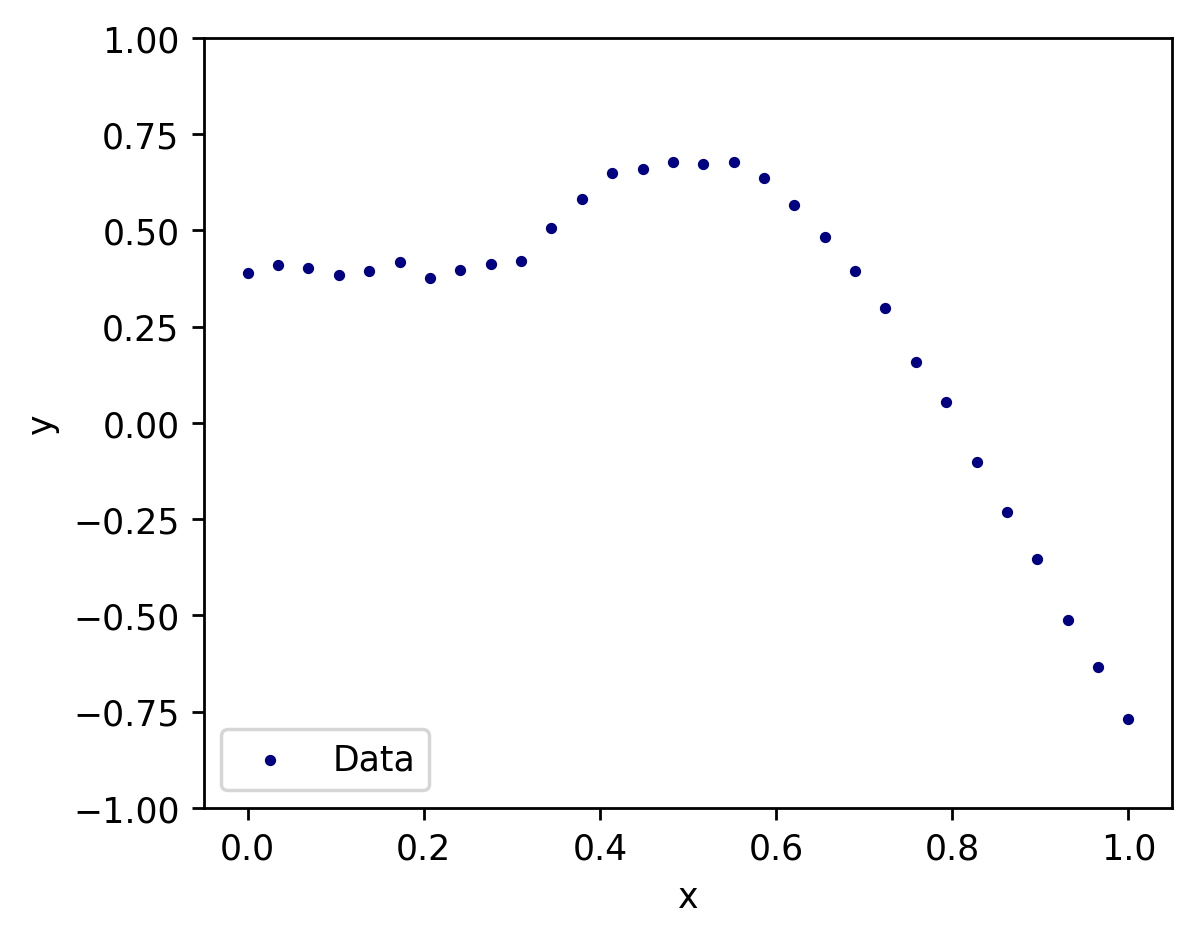

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import optim, nn
import torch.nn.functional as F

x = np.array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ]).reshape(-1,1)
y = np.array([ 0.38914369,  0.40997345,  0.40282978,  0.38493705,  0.394214  ,0.41651437,  0.37573321,  0.39571087,  0.41265936,  0.41953955,0.50596807,  0.58059196,  0.6481607 ,  0.66050901,  0.67741369,0.67348567,  0.67696078,  0.63537378,  0.56446933,  0.48265412,0.39540671,  0.29878237,  0.15893846,  0.05525194, -0.10070259,-0.23055219, -0.35288448, -0.51317604, -0.63377544, -0.76849408]).reshape(-1,1)


plt.figure(figsize=(5,4),dpi=250)
plt.scatter(x,y,s=5,c="navy",label="Data")
plt.legend(loc="lower left")
plt.ylim(-1,1)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## PyTorch Tensors

PyTorch models only work with PyTorch Tensors, so we need to convert our dataset into a tensors.

To convert these back to numpy arrays we can use:
- `x.detach().numpy()`
- `y.detach().numpy()`

In [83]:
x = torch.Tensor(x)
y = torch.Tensor(y)

## PyTorch Module

We create a subclass whose superclass is `nn.Module`, a basic predictive model, and we must define 2 methods.  

**`nn.Module` subclass:**
- `__init__()`
  - runs when creating a new model instance
  - includes the line `super().__init__()` to inherit parent methods from `nn.Module`
  - sets up all necessary model components/parameters
- `forward()`
  - runs when calling a model instance
  - performs a forward pass through the network given an input tensor.


This class `Net_2_layer` is an MLP for regression with 2 layers. At initialization, the user inputs the number of hidden neurons per layer, the number of inputs and outputs, and the activation function.

In [84]:
class Net_2_layer(nn.Module):
    def __init__(self, N_hidden=6, N_in=1, N_out=1, activation = F.relu):
        super().__init__()
        # Linear transformations -- these have weights and biases as trainable parameters, 
        # so we must create them here.
        self.lin1 = nn.Linear(N_in, N_hidden)
        self.lin2 = nn.Linear(N_hidden, N_hidden)
        self.lin3 = nn.Linear(N_hidden, N_out)
        self.act = activation

    def forward(self,x):
        x = self.lin1(x)
        x = self.act(x)  # Activation of first hidden layer
        x = self.lin2(x)
        x = self.act(x)  # Activation at second hidden layer
        x = self.lin3(x) # (No activation at last layer)

        return x

## Instantiate a model
This model has 6 neurons at each hidden layer, and it uses ReLU activation.

In [85]:
model = Net_2_layer(N_hidden = 6, activation = F.relu)
loss_curve = []

## Training a model

In [86]:
# Training parameters: Learning rate, number of epochs, loss function
# (These can be tuned)
lr = 0.005
epochs = 1500
loss_fcn = F.mse_loss

# Set up optimizer to optimize the model's parameters using Adam with the selected learning rate
opt = optim.Adam(params = model.parameters(), lr=lr)

# Training loop
for epoch in range(epochs):
    out = model(x) # Evaluate the model
    loss = loss_fcn(out,y) # Calculate the loss -- error between network prediction and y

    loss_curve.append(loss.item())

    # Print loss progress info 25 times during training
    if epoch % int(epochs / 25) == 0:
        print(f"Epoch {epoch} of {epochs}... \tAverage loss: {loss.item()}")

    # Move the model parameters 1 step closer to their optima:
    opt.zero_grad()
    loss.backward()
    opt.step()


Epoch 0 of 1500... 	Average loss: 0.2743450999259949
Epoch 60 of 1500... 	Average loss: 0.132395401597023
Epoch 120 of 1500... 	Average loss: 0.0693087950348854
Epoch 180 of 1500... 	Average loss: 0.04530538618564606
Epoch 240 of 1500... 	Average loss: 0.02516205795109272
Epoch 300 of 1500... 	Average loss: 0.010957315564155579
Epoch 360 of 1500... 	Average loss: 0.0034239196684211493
Epoch 420 of 1500... 	Average loss: 0.0022208059672266245
Epoch 480 of 1500... 	Average loss: 0.0022069222759455442
Epoch 540 of 1500... 	Average loss: 0.0022069131955504417
Epoch 600 of 1500... 	Average loss: 0.0022069134283810854
Epoch 660 of 1500... 	Average loss: 0.00220691435970366
Epoch 720 of 1500... 	Average loss: 0.00220691435970366
Epoch 780 of 1500... 	Average loss: 0.00220691435970366
Epoch 840 of 1500... 	Average loss: 0.00220691435970366
Epoch 900 of 1500... 	Average loss: 0.0022069131955504417
Epoch 960 of 1500... 	Average loss: 0.0022069131955504417
Epoch 1020 of 1500... 	Average loss: 0.0

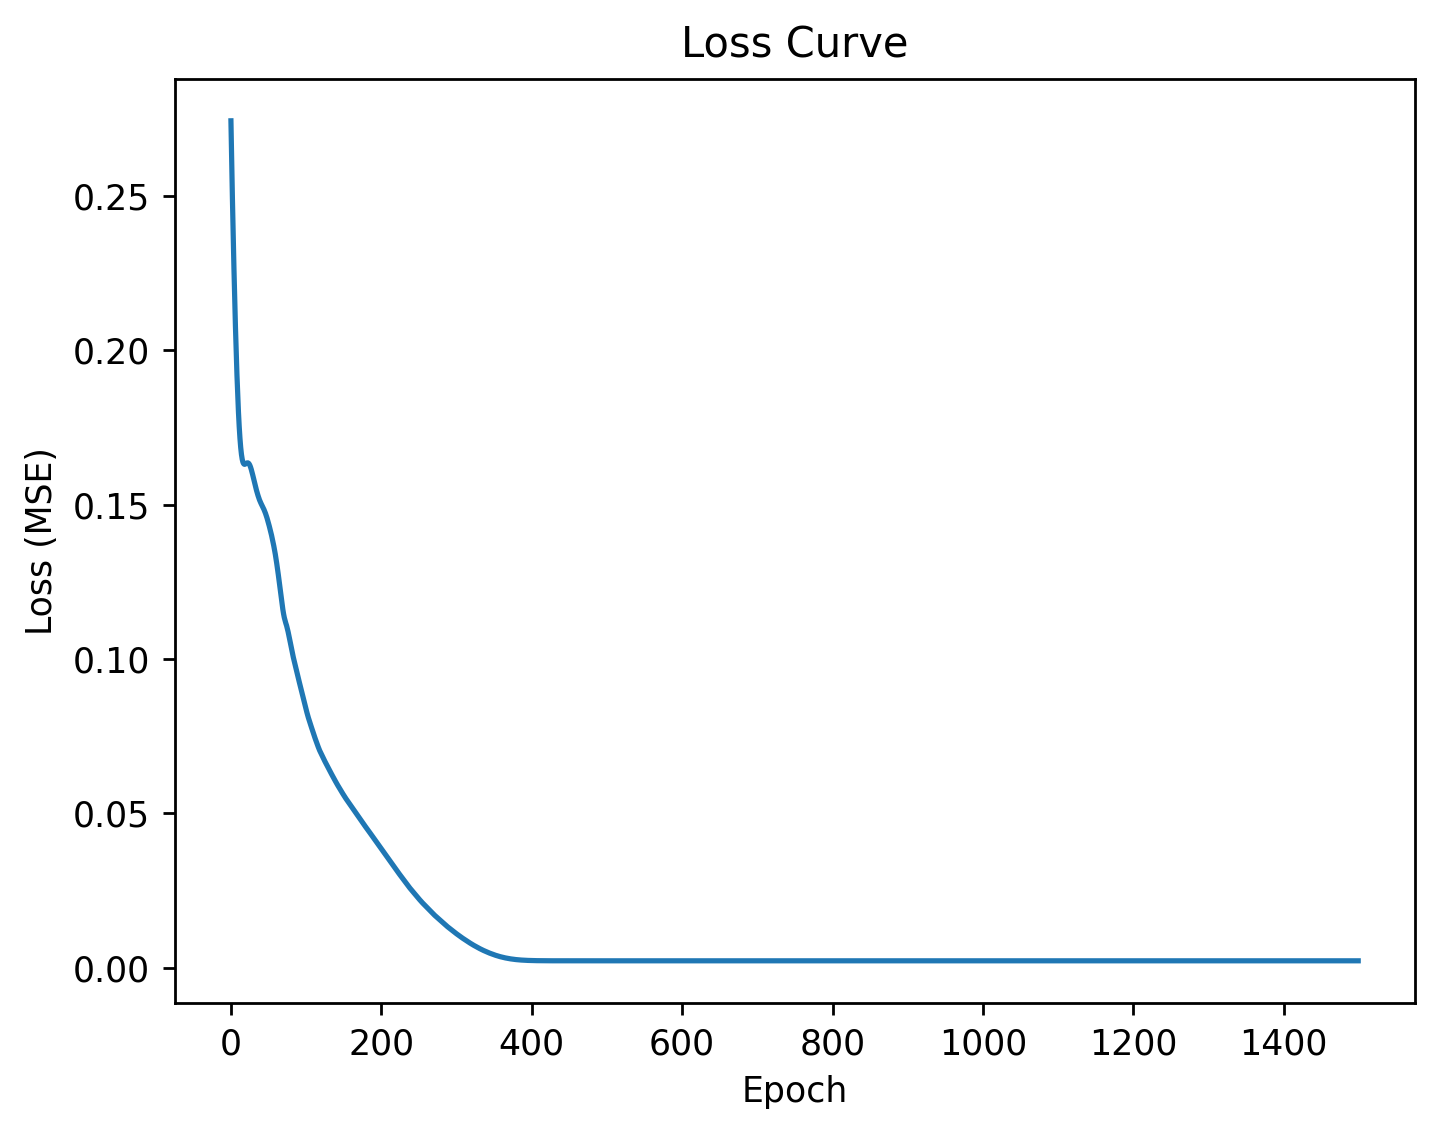

In [87]:
plt.figure(dpi=250)
plt.plot(loss_curve)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Loss Curve')
plt.show()

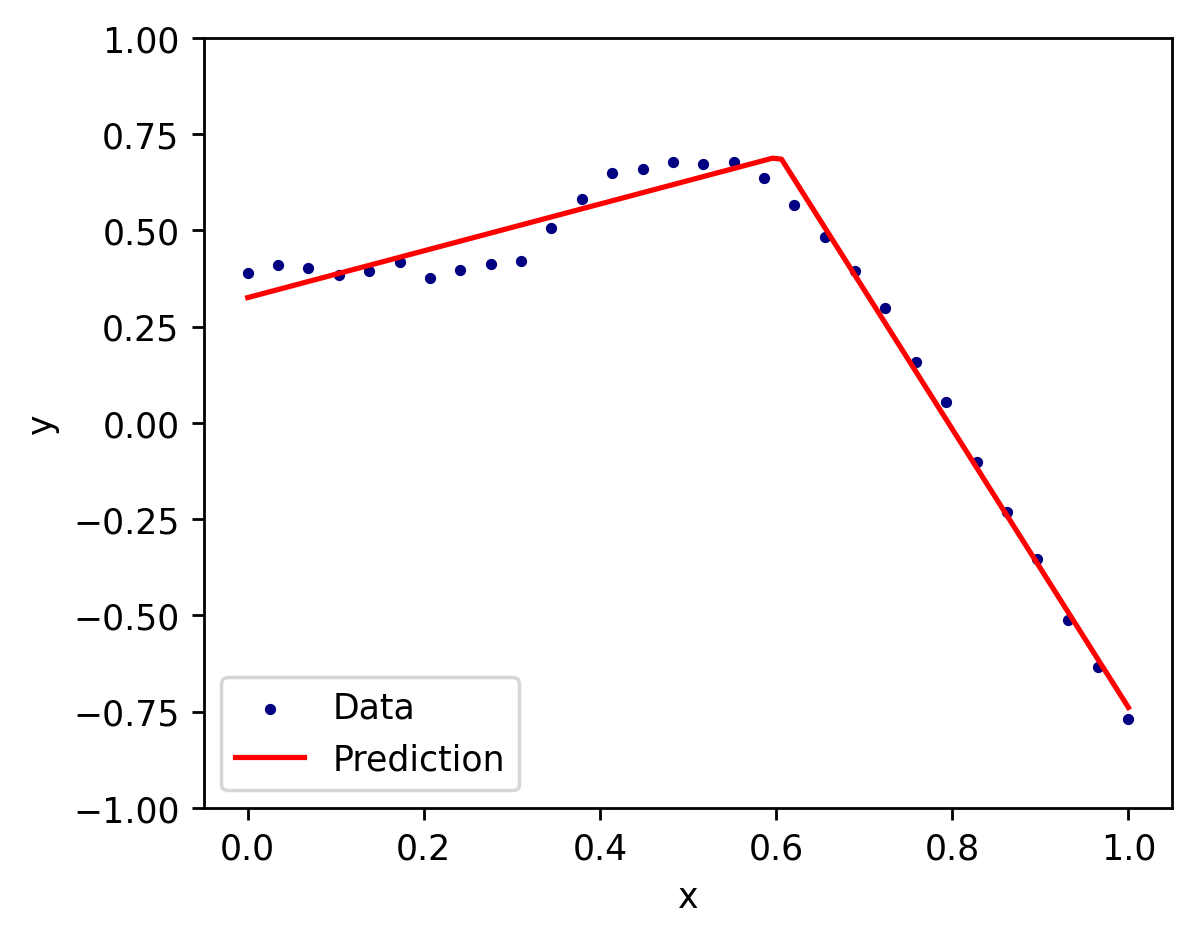

In [88]:
xs = torch.linspace(0,1,100).reshape(-1,1)
ys = model(xs)

plt.figure(figsize=(5,4),dpi=250)
plt.scatter(x,y,s=5,c="navy",label="Data")
plt.plot(xs.detach().numpy(), ys.detach().numpy(),"r-",label="Prediction")
plt.legend(loc="lower left")
plt.ylim(-1,1)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Your Turn

In the cells below, create a new instance of `Net_2_layer`. This time, use 20 neurons per hidden layer, and an activation of `F.tanh`.
Plot the loss curve and a visualization of the prediction with the data.

Epoch 0 of 2000... 	Average loss: 0.20178550481796265
Epoch 80 of 2000... 	Average loss: 0.0942194014787674
Epoch 160 of 2000... 	Average loss: 0.08923618495464325
Epoch 240 of 2000... 	Average loss: 0.0834728479385376
Epoch 320 of 2000... 	Average loss: 0.07267088443040848
Epoch 400 of 2000... 	Average loss: 0.045521676540374756
Epoch 480 of 2000... 	Average loss: 0.010963868349790573
Epoch 560 of 2000... 	Average loss: 0.00200986722484231
Epoch 640 of 2000... 	Average loss: 0.000779082125518471
Epoch 720 of 2000... 	Average loss: 0.0004827996017411351
Epoch 800 of 2000... 	Average loss: 0.00034238473745062947
Epoch 880 of 2000... 	Average loss: 0.00026838452322408557
Epoch 960 of 2000... 	Average loss: 0.0002306915557710454
Epoch 1040 of 2000... 	Average loss: 0.00021219441259745508
Epoch 1120 of 2000... 	Average loss: 0.00020320624753367156
Epoch 1200 of 2000... 	Average loss: 0.00019859996973536909
Epoch 1280 of 2000... 	Average loss: 0.0001958789798663929
Epoch 1360 of 2000... 	Av

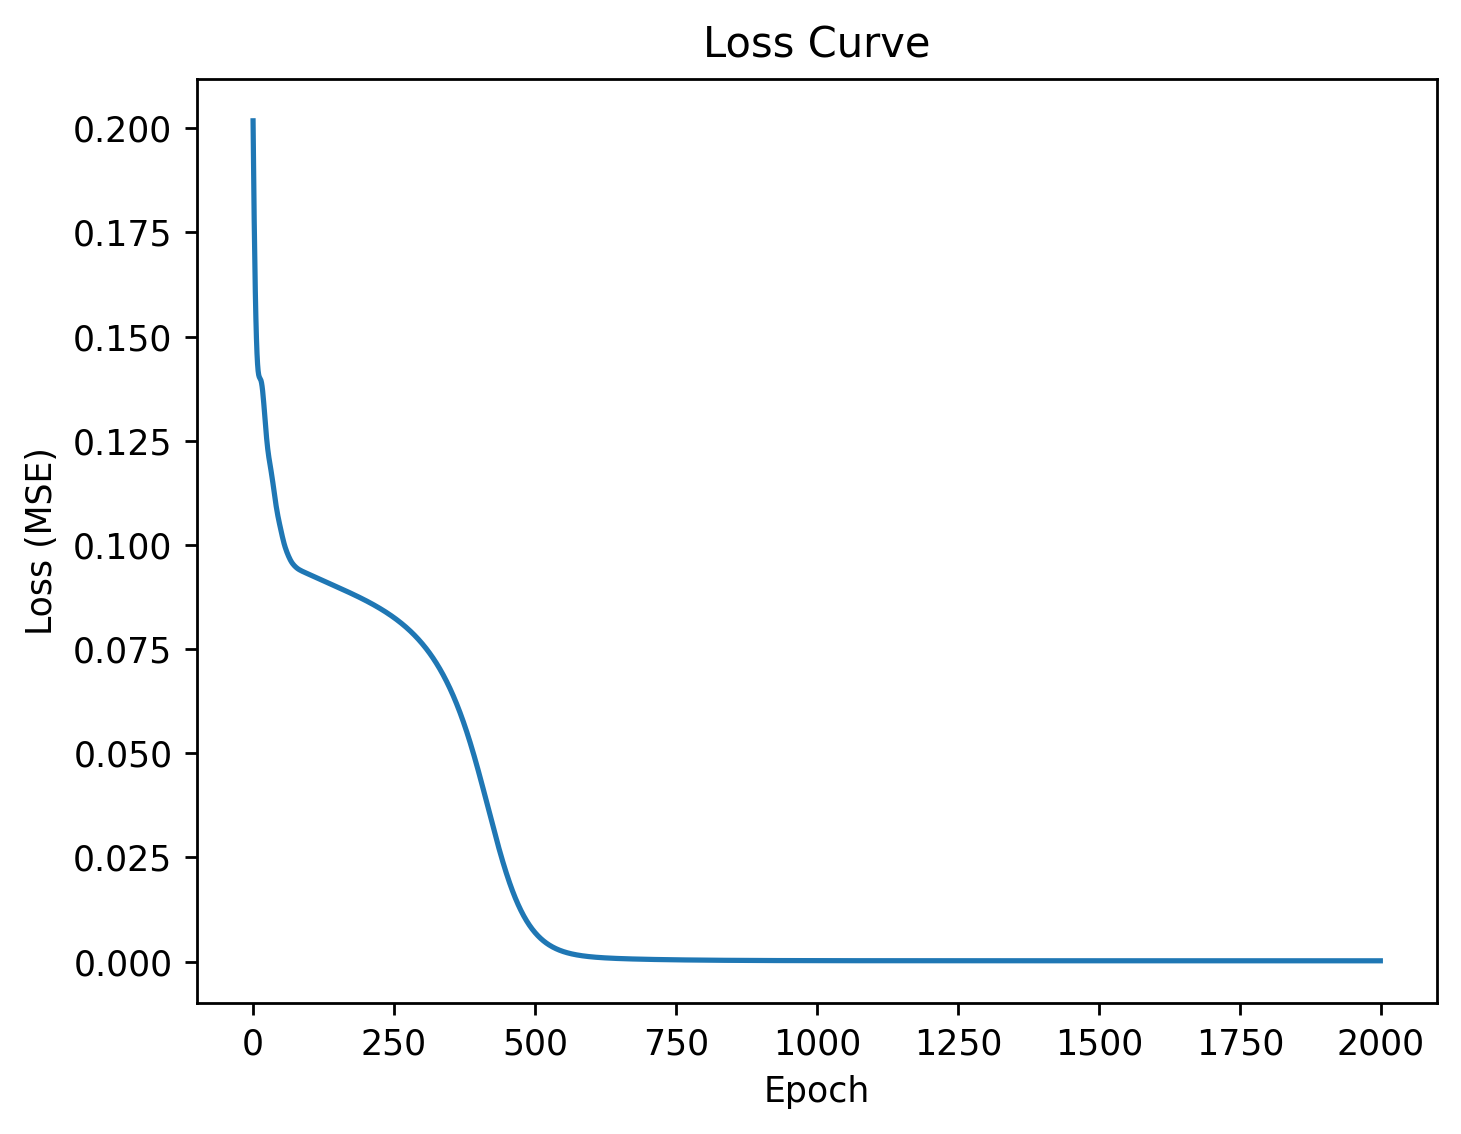

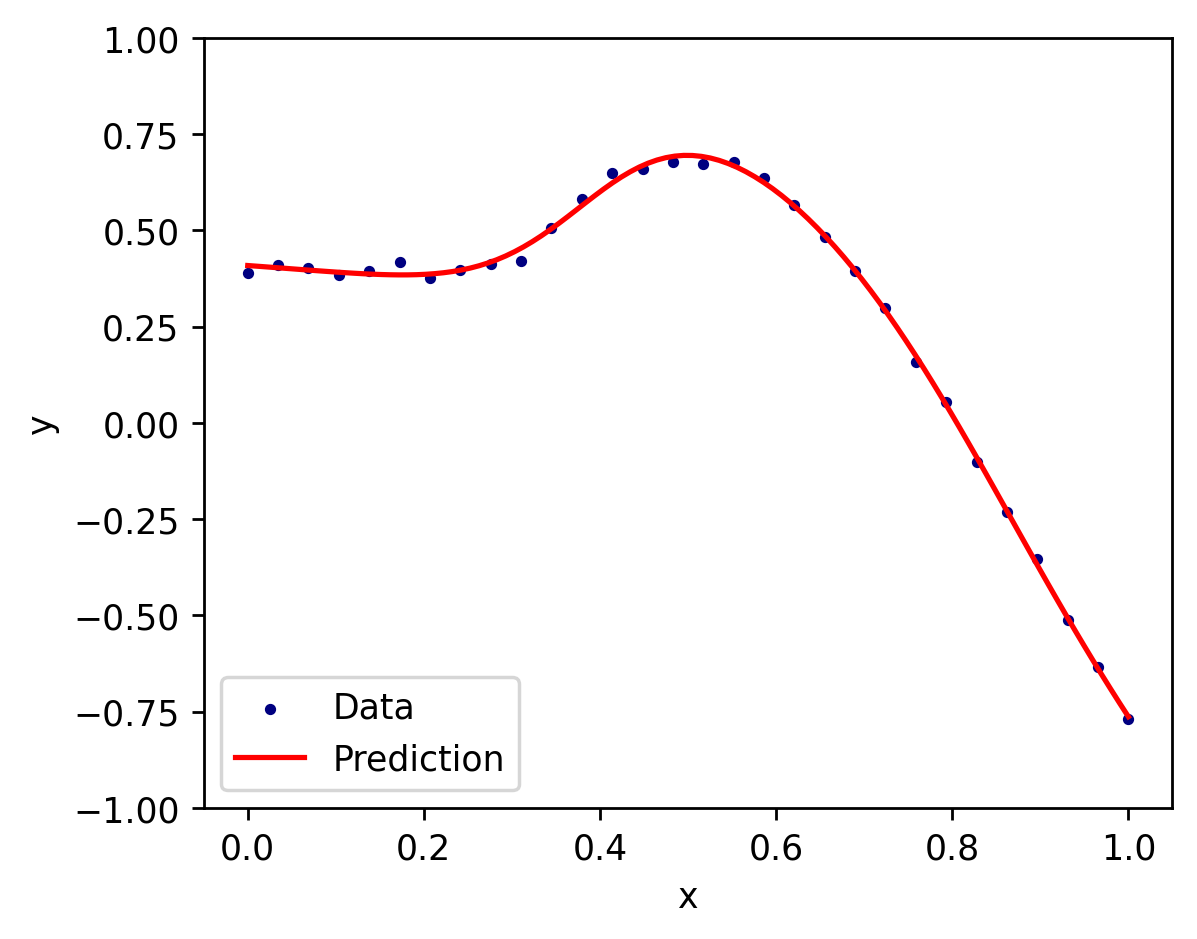

: 

In [94]:
# YOUR CODE GOES HERE
model1 = Net_2_layer(N_hidden = 20, activation = F.tanh)
loss_curve1 = []

lr = 0.001
epochs1 = 2000
loss_fcn = F.mse_loss

# Set up optimizer to optimize the model's parameters using Adam with the selected learning rate
opt = optim.Adam(params = model1.parameters(), lr=lr)

# Training loop
for epoch1 in range(epochs1):
    out = model1(x) # Evaluate the model
    loss = loss_fcn(out,y) # Calculate the loss -- error between network prediction and y

    loss_curve1.append(loss.item())

    # Print loss progress info 25 times during training
    if epoch1 % int(epochs1 / 25) == 0:
        print(f"Epoch {epoch1} of {epochs1}... \tAverage loss: {loss.item()}")

    # Move the model parameters 1 step closer to their optima:
    opt.zero_grad()
    loss.backward()
    opt.step()


plt.figure(dpi=250)
plt.plot(loss_curve1)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Loss Curve')
plt.show()

xs1 = torch.linspace(0,1,100).reshape(-1,1)
ys1 = model1(xs1)

plt.figure(figsize=(5,4),dpi=250)
plt.scatter(x,y,s=5,c="navy",label="Data")
plt.plot(xs1.detach().numpy(), ys1.detach().numpy(),"r-",label="Prediction")
plt.legend(loc="lower left")
plt.ylim(-1,1)
plt.xlabel("x")
plt.ylabel("y")
plt.show()